# Packages

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib as plt
import matplotlib.pyplot as plt

2024-07-08 23:20:27.142092: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 23:20:27.142220: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 23:20:27.261617: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Softmax Function 

A multiclass neural network generates N outputs. One output is selected as the predicted answer. In the output layer, a vector  𝐳
  is generated by a linear function which is fed into a softmax function. The softmax function converts  𝐳
  into a probability distribution as described below. After applying softmax, each output will be between 0 and 1 and the outputs will sum to 1. They can be interpreted as probabilities. The larger inputs to the softmax will correspond to larger output probabilities.
  
  
  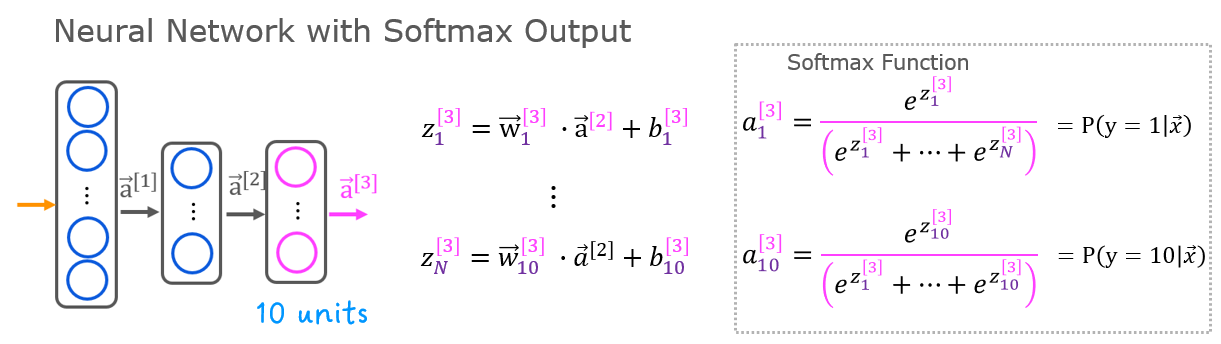

### Let's create a NumPy implementation

In [2]:
def my_softmax(z):  
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """    

    N = len(z)
    a = np.zeros(N)                   # initialize a to zeros 
    ez_sum = 0              # initialize sum to zero
    for k in range(N):      # loop over number of outputs             
        ez_sum += np.exp(z[k])           # sum exp(z[k]) to build the shared denominator      
    for j in range(N):      # loop over number of outputs again                
        a[j] = np.exp(z[j]) / ez_sum             # divide each the exp of each output by the denominator   
        
    
    return a

In [3]:
def test_my_softmax(softmax_function):
    z = np.array([1., 2., 3., 4.])
    a = softmax_function(z)
    atf = tf.nn.softmax(z)
    print(f"my_softmax(z):         {a}")
    print(f"tensorflow softmax(z): {atf}")

test_my_softmax(my_softmax)

my_softmax(z):         [0.0320586  0.08714432 0.23688282 0.64391426]
tensorflow softmax(z): [0.0320586  0.08714432 0.23688282 0.64391426]


## Loading dataset

In [4]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [5]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data preparation

In [6]:
X_train = train.drop(labels = ["label"],axis = 1)
Y_train = train["label"]

X = train.drop('label', axis=1).values
y = train['label'].values.reshape(-1, 1)

# Output the first element of X to match the format you requested
print('The first element of X is:' ,X[0,0])
print('The first element of y is:' ,y[-1,0])

The first element of X is: 0
The first element of y is: 9


## Check the dimesions of the variables

In [7]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (42000, 784)
The shape of y is: (42000, 1)


## Normalization

In [8]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

## Split training and valdiation set

In [9]:
from sklearn.model_selection import train_test_split
# Set the random seed
random_seed = 2
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

# Visualizing the Data

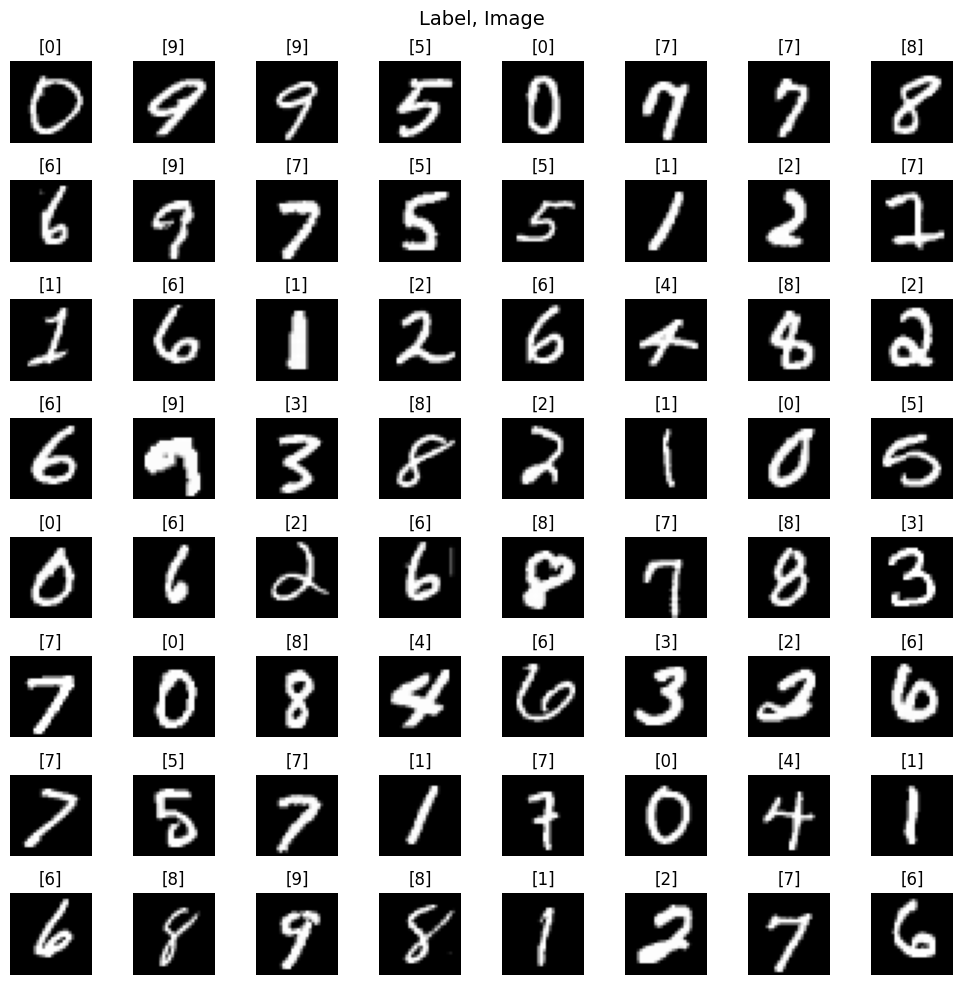

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
# Select 64 random rows from X
random_indices = np.random.choice(X.shape[0], 64, replace=False)
X_subset = X[random_indices]
y_subset = y[random_indices]

# Plot the images
plt.figure(figsize=(10, 10))
for i in range(64):
    # Reshape the image to 28x28 pixels
    img = X_subset[i].reshape(28, 28)
    
    # Create a subplot
    plt.subplot(8, 8, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(y_subset[i])
    plt.axis('off')

plt.suptitle("Label, Image", fontsize=14)
plt.tight_layout()
plt.show()

# Tensorflow Model Implementation

In [11]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [                
        tf.keras.Input(shape=(784,)),
        Dense(480, activation='relu', name = "L1"),
        Dense(256, activation='relu', name = "L2"),
        Dense(112, activation='relu', name = "L3"),
        Dense(10, activation='softmax', name = "L4"),
        
        
    ], name = "my_model" 
)

In [12]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 480)            │       376,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 256)            │       123,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 112)            │        28,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L4 (Dense)                      │ (None, 10)             │         1,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529,850 (2.02 MB)

 Trainable params: 529,850 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
[layer1, layer2, layer3, layer4] = model.layers

In [14]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
W4,b4 = layer4.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")
print(f"W4 shape = {W4.shape}, b4 shape = {b4.shape}")

W1 shape = (784, 480), b1 shape = (480,)
W2 shape = (480, 256), b2 shape = (256,)
W3 shape = (256, 112), b3 shape = (112,)
W4 shape = (112, 10), b4 shape = (10,)


# Loss function

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
)

history = model.fit(
    X_train, Y_train,
    epochs=50,
    validation_data=(X_val, Y_val),
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
)

Epoch 1/50
 102/1182 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.0365

I0000 00:00:1720480852.030351      66 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1182/1182 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.8317 - val_loss: 0.2124
Epoch 2/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.1891 - val_loss: 0.1602
Epoch 3/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1294 - val_loss: 0.1332
Epoch 4/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0955 - val_loss: 0.1174
Epoch 5/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0728 - val_loss: 0.1070
Epoch 6/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0562 - val_loss: 0.1002
Epoch 7/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0433 - val_loss: 0.0960
Epoch 8/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0332 - val_loss: 0.0933
Epoch 9/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0252 - val_loss: 0.0912
Epoch 10/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0186 - val_loss: 0.0914
Epoch 11/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0136 - val_loss: 0.0941
Epoch 12/50
1182/1182 ━━━━━━━━━━━━━━━━━━━

In [16]:
# Evaluate training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

print(f"Training Loss: {train_loss[-1]:.4f}")
print(f"Validation Loss: {val_loss[-1]:.4f}")

Training Loss: 0.0030
Validation Loss: 0.0924


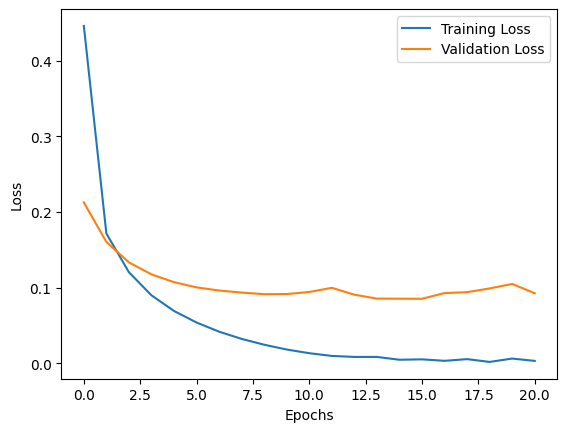

In [17]:
def plot_loss_tf(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss_tf(history)

## Prediction

In [18]:
print(train[train['label'] == 2].head(1))

    label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
16      2       0       0       0       0       0       0       0       0   

    pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
16       0  ...         0         0         0         0         0         0   

    pixel780  pixel781  pixel782  pixel783  
16         0         0         0         0  

[1 rows x 785 columns]


In [19]:
import matplotlib.pyplot as plt

def display_digit(image):
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()

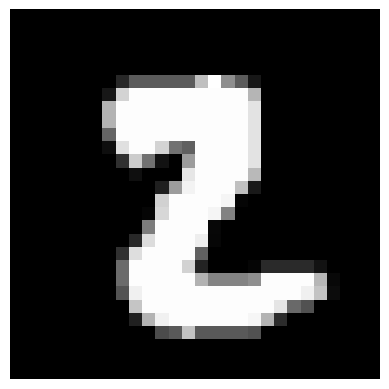

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
Predicting a Two: 
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Largest Prediction index: 2


In [20]:
image_of_two = X[16]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1, 784))  # prediction
print(f"Predicting a Two: \n{prediction}")
print(f"Largest Prediction index: {np.argmax(prediction)}")

In [21]:
prediction_p = tf.nn.softmax(prediction)

print(f"Predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total probability: {np.sum(prediction_p):.0f}")

Predicting a Two. Probability vector: 
[[0.08533675 0.08533675 0.23196931 0.08533675 0.08533675 0.08533675
  0.08533675 0.08533675 0.08533675 0.08533675]]
Total probability: 1


In [22]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


### Let's compare the predictions vs the labels for a random sample of 64 digits.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

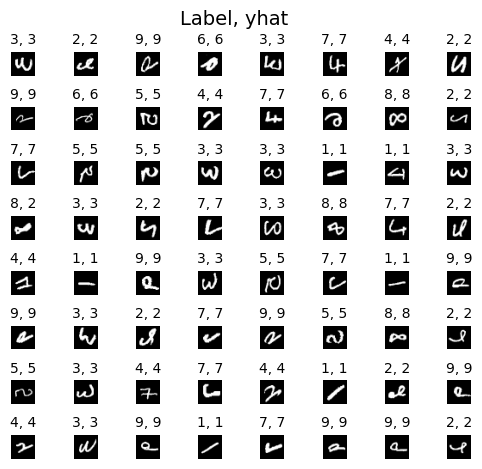

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from IPython.display import display
import ipywidgets as widgets

# Assuming X, y, and model are defined elsewhere in your code
m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(5, 5))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])  # [left, bottom, right, top]

for i, ax in enumerate(axes.flat):
        # Select random indices
        random_index = np.random.randint(m)

        # Select rows corresponding to the random indices and
        # reshape the image
        X_random_reshaped = X[random_index].reshape((28, 28)).T

        # Display the image
        ax.imshow(X_random_reshaped, cmap='gray')

        # Predict using the Neural Network
        prediction = model.predict(X[random_index].reshape(1, 784))
        prediction_p = tf.nn.softmax(prediction)
        yhat = np.argmax(prediction_p)

        # Display the label above the image
        ax.set_title(f"{y[random_index, 0]}, {yhat}", fontsize=10)
        ax.set_axis_off()

fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load datasets
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

# Separate features and labels in the training dataset
X = train.drop(columns=['label'])
y = train['label']

# Define X_train, Y_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define X_test from the test dataset (test dataset does not have labels)
X_test = test

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (33600, 784)
y_train shape: (33600,)
X_val shape: (8400, 784)
y_val shape: (8400,)
X_test shape: (28000, 784)


# Fitting the model

In [25]:
model.fit(X_train, y_train)

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9.7356


In [26]:
y_pred = model.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


# Model Evaluation

In [27]:
from sklearn.metrics import r2_score
import numpy as np

# Convert probabilities to class labels
y_pred_prob = model.predict(X_val)
y_pred = model.predict(X_test)
y_pred_class1 = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels
y_pred_class2 = np.argmax(y_pred, axis=1)

# Check and adjust shapes
print(f"y_val shape: {y_val.shape}")
print(f"y_pred_class shape: {y_pred_class1.shape}")

y_true = y_val.ravel()

# Calculate R2 score
r2 = r2_score(y_true, y_pred_class1)
print(f"R2 Score: {r2}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
y_val shape: (8400,)
y_pred_class shape: (8400,)
R2 Score: 0.9818070914399808


# Submission

In [28]:
submission = pd.DataFrame({'ImageId': list(range(1, len(y_pred_class2) + 1)), 'Label': y_pred_class2})
submission.to_csv('/kaggle/working/submission.csv', index=False)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
